## PROJECT 1
 

I chose to analyze the 'tmdb dataset' for this project

## Table of contents

1. Introduction
2. Data wrangling
3. Exploratory data analysis
4. Conclusion

## Introduction

The movie database(tmdb) is a community built movie and TV database that boasts of millions of users every single day, and at such generates large amounts of data. This dataset is a csv file that contains movies generated from the 1960's to 2015 and has 10,866 rows and 21 columns.

Some questions that i hope to answer at the end of this analysis are:

1. What is the average runtime of the most popular movies?
2. what genre were most of the movies made in?
3. Who directed the most popular movies?
4. Which year had the highest amount of movie runtime?
5. Which year had the most release of popular movies?



In [1]:
# import the necessary libaries for data cleaning
import pandas as pd
import numpy as np

## Data wrangling 

In this section, we'll load in the data, investigate and check for cleanliness

In [2]:
# read csv file into a pandas data frame
df=pd.read_csv(r"C:\Users\MR MOHAMMED\Desktop\tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# checking the dimension of the dataframe
df.shape

(10866, 21)

In [5]:
# checking the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# a concise summary of the dataframe and number of non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Date was given in string format so it is important that we convert it to 'datetime' format for the purpose of this analysis

In [7]:
# checking for the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# checking for a descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [10]:
# check for duplicated columns or rows
df.duplicated().sum()

1

In [11]:
# remove duplicate
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

Duplicate has been removed

In [12]:
# checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# dataset has some missing values

I'll be dropping columns with missing values

In [14]:
# drop missing values
df.dropna(inplace=True)
df.shape

(1992, 21)

In [15]:
# confirming that the null values has been removed
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Next, i'll be removing uneccesary columns that will not be useful for my analysis

In [16]:
# remove unecessary columns
df.drop(['imdb_id','budget','revenue', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview',  'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [17]:
# checking the dimensions of the dataframe
df.shape

(1992, 7)

In [18]:
df.head()

,id,popularity,director,runtime,genres,vote_average,release_year
0,135397,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,James Wan,137,Action|Crime|Thriller,7.3,2015


## Exploratory data analysis

i will proceed to use visuslization libary matplotlib to explore and identify patterns in the data as well as answer the questions posed above.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Question 1: What is the average runtime of the most popular movies?

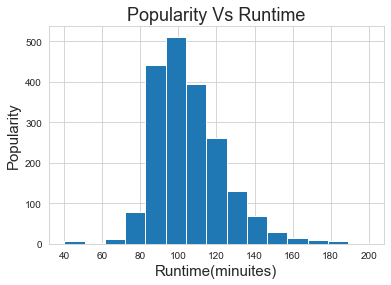

In [36]:
# set the range and plot the graph
plt.hist(df['runtime'],range=(40,200),bins = 15)
# add label and title
plt.title('Popularity Vs Runtime', fontsize=18)
plt.xlabel('Runtime(minuites)', fontsize=15)
plt.ylabel('Popularity',fontsize = 15)
sns.set_style("whitegrid")
plt.show()

**The above graph shows that the vast majority of popular movies are between 90-110 minuites but the most popular movies have a runtime of 100 minuites**.

## Question 2: Which genre were most of the movies made in?

In [21]:
# split and return count of each genre
def data(x):
    # link all the rows together
    data = df.assign(genres=df.genres.str.split('|'))
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    # link each of the elements in the row and return
    info = data.value_counts(ascending=False)
    return info

In [22]:
# count and seperate the genres
movie_genre = data('genres')

Text(0, 0.5, 'Genres')

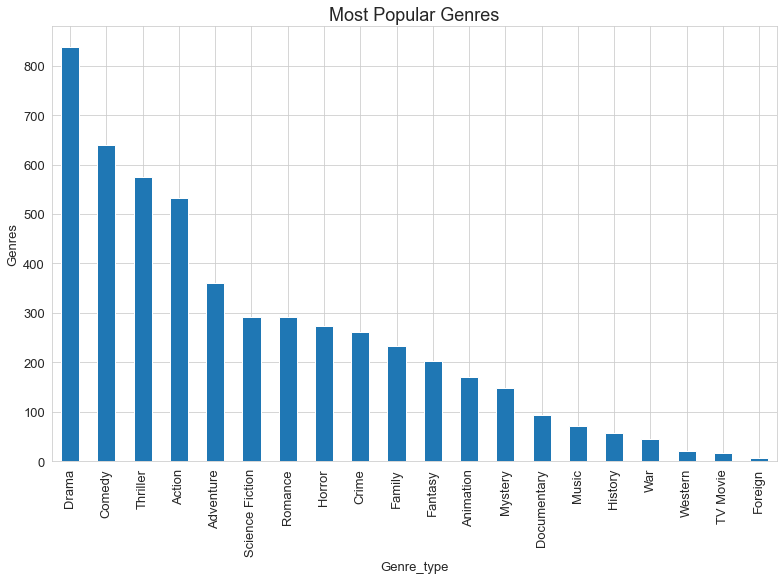

In [23]:
# plot a bar graph
movie_genre.plot(kind='bar',figsize = (13,8),fontsize=13)
# add title and label
plt.title('Most Popular Genres', fontsize=18)
plt.xlabel('Genre_type', fontsize=13)
plt.ylabel('Genres',fontsize = 13)

Text(0, 0.5, 'genres')

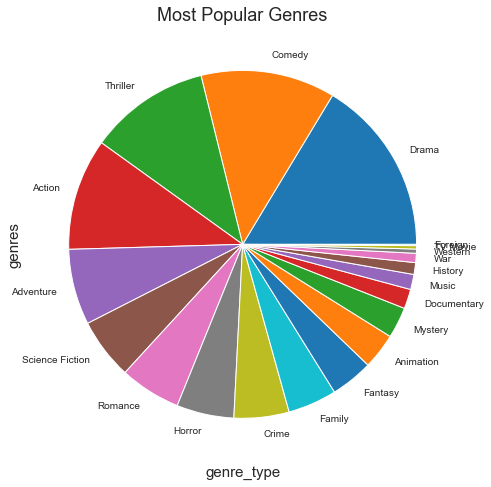

In [24]:
# plot the graph
movie_genre.plot(kind='pie',figsize = (11,8),fontsize=10)
# add title and label
plt.title('Most Popular Genres', fontsize=18)
plt.xlabel('genre_type', fontsize=15)
plt.ylabel('genres',fontsize = 15)

**'Drama' was the most frequently occouring genre, followed by 'comedy,thriller and action'**

## Question 3: Who directed the most popular movies? 

In [25]:
# seperate and count the movie directors
movie_director_count = data('director')

Text(0, 0.5, 'popularity')

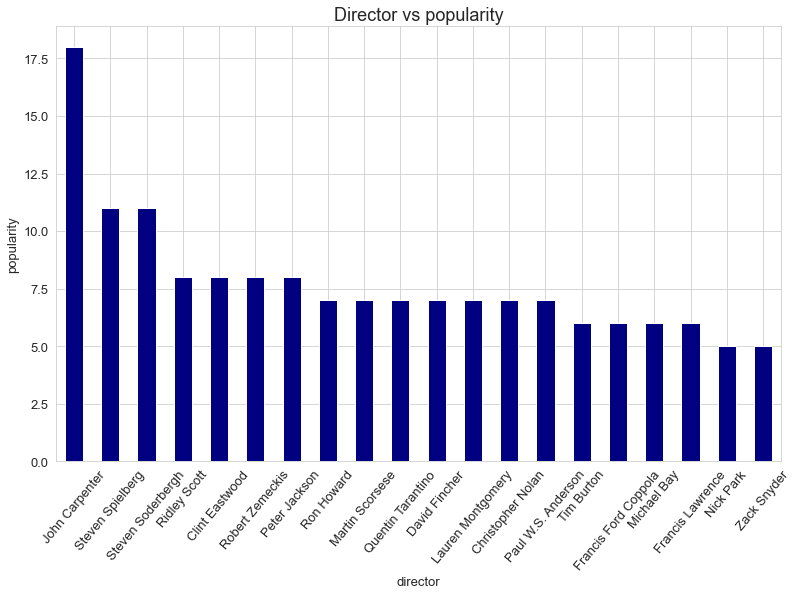

In [26]:
# plot a bar graph
movie_director_count.iloc[:20].plot(kind='bar',figsize = (13,8),fontsize=13,colormap='jet')
plt.xticks(rotation = 50)
# add title and label
plt.title('Director vs popularity', fontsize=18)
plt.xlabel('director', fontsize=13)
plt.ylabel('popularity',fontsize = 13)

**The most popular movies were directed by John Carpenter**

## Question 4:Which year has the highest amount of movies runtime? 

In [27]:
# split the 'release_year' row in respect to 'id'
data=df.groupby('release_year').count()['id']

Text(0.5, 1.0, 'Distribution of runtime over the years')

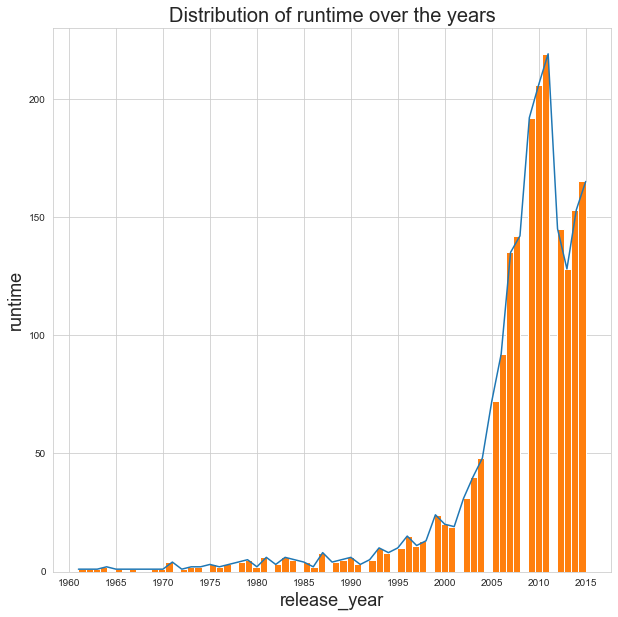

In [28]:
# set and plot the graph
data.plot(xticks = np.arange(1960,2016,5))
df['release_year'].hist(figsize = (10,10), bins = 70)
# add label and title
plt.xlabel('release_year', fontsize=18)
plt.ylabel('runtime', fontsize=18)
plt.title('Distribution of runtime over the years', fontsize=20)

**We can deduce from the graph above that year 2010 has the highest amount of movie runtime release**.

## Question 5: Which year had the most release of popular movies?

Text(0.5, 1.0, 'Popularity Vs Year of release')

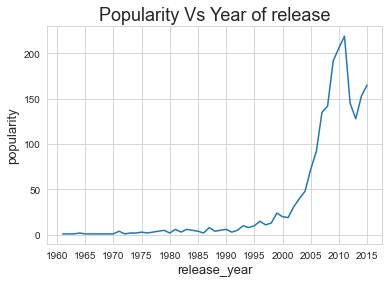

In [29]:
# split the 'release_year' row in respect to 'vote_average'
data=df.groupby('release_year').count()['vote_average']
# label and title the graph
data.plot(xticks = np.arange(1960,2016,5))
plt.xlabel('release_year', fontsize = 13)
plt.ylabel('popularity',fontsize = 13)
plt.title('Popularity Vs Year of release',fontsize = 18)

Text(0.5, 1.0, 'Popularity Vs Year of release')

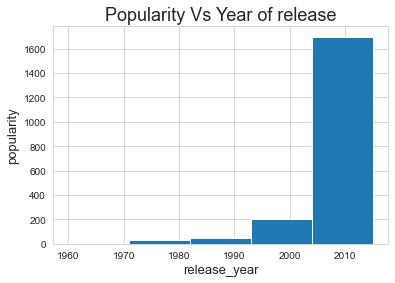

In [30]:
plt.hist(df['release_year'],range=(1960,2015),bins = 5)
# add label and title
plt.xlabel('release_year', fontsize = 13)
plt.ylabel('popularity',fontsize = 13)
plt.title('Popularity Vs Year of release',fontsize = 18)

*We can conclude from the graphs above that 2010 was the year that had the highest release of popular movies*.

From the answers from question 4 and 5 above, we can safely deduce that the year 2010 was the 'year of movies' as it doubles as the year which the most popular movies were released and also the year with the highest movie runtime.

<AxesSubplot:ylabel='Frequency'>

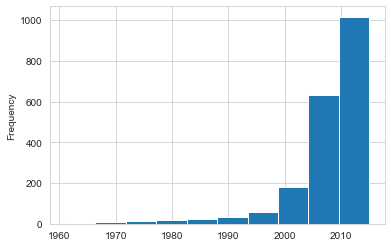

In [32]:
# plotting a univariate graph to check for unique features in 'release_year' column
df["release_year"].plot(kind='hist')

<AxesSubplot:>

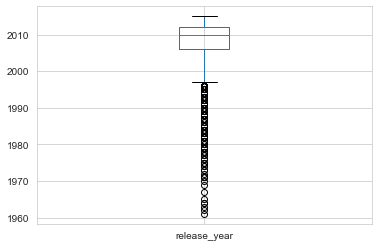

In [34]:
# plotting a univariate graph to check for unique features in the 'release_year' column
df["release_year"].plot(kind='box')

we can conclude fron the graphs above that 2010 was indeed the year of peak production of movies.

## Conclusions

I began my analysis by importing the dataset and then moving on to clean the data by checking for duplicates and null values and dealing with them as necessary. Then i moved on to explore the data and answer the question i posed to the data before i began my analysis and i was able to answer them successfully.

According to my analysis:
* Most popular movies have an average runtime of 100 minuites.
* The most popularly watched movie genre are 'Dramas'. 
* John Carpenter directed the most popular movies.
* I also observed that 2010 doubles as the year in which most of the popular movies were released and also had the highest amount of movie runtime.

My analysis was based mainly on corelation between variables and at such lacks any statistical deductions.


## Limitations

In the beginning of my analysis, the dataset had a total of 10,866 rows and 21 columns but after removal of missing values and a duplicate value, the dataset was reduced to a total of 1,992 rows. This means that a total of 8,874 rows are missing from the dataset. This is a ridiculously high amount of missing values! And this could have affected the accuracy and result of the analysis.